In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df=pd.read_csv(r'/Users/krushnal/Downloads/practice/Heart.csv')

In [5]:
df

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0
...,...,...,...
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9


In [39]:
df.shape

(303, 15)

In [40]:
df.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [42]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [43]:
df==0

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False
4,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False
299,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
300,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
301,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False


In [44]:
df[df==0]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [45]:
df[df==0].count()

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

In [46]:
df.Age.mean()

54.43894389438944

In [47]:
df['Age'].mean()

54.43894389438944

In [48]:
newdf=df[['Age','Sex','ChestPain','RestBP','Chol']]

In [49]:
newdf

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [50]:
train,test=train_test_split(df,test_size=0.25,random_state=1)

In [51]:
train.shape

(227, 15)

In [52]:
test.shape

(76, 15)

In [53]:
actual=list(np.ones(45))+list(np.zeros(55))
np.array(actual)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
predicted=list(np.ones(100))
np.array(predicted)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

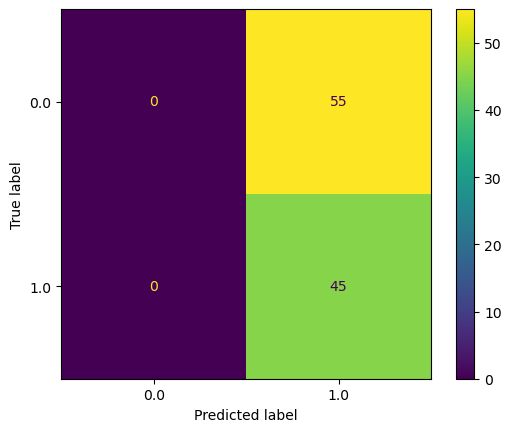

In [55]:
ConfusionMatrixDisplay.from_predictions(actual,predicted)

In [56]:
TP=45
FP=55
TN=0
FN=0

In [57]:
accuracy = (TP + TN)/(TP + FP + TN + FN)

In [58]:
accuracy

0.45

In [59]:
recall = (TP)/(TP+FN)
recall

1.0

In [60]:
precision = TP/(TP+FP)
precision

0.45

In [61]:
f1_score=2*((recall*precision)/(recall+precision))
f1_score

0.6206896551724138